* Load dataset using scikit-learn
  * Load Iris dataset
  * Load Diabetes dataset


In [1]:
from sklearn import datasets

# import iris data
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print("Data in Iris dataset")
print(X[:5])
print(Y[:5])

Data in Iris dataset
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [2]:
from sklearn import datasets

# import diabetes data 
diabetes = datasets.load_diabetes()
X = diabetes.data
Y = diabetes.target
print("Data in Diabetes dataset")
print(X[:5])
print(Y[:5])

Data in Diabetes dataset
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


- Basic usage of scikit-learn
  - Regression with linear regression
  - Classification with logistic regression
  - Classification with support vector machine
  - Classification with K-nearest neighbours
  - Clustering with K-means

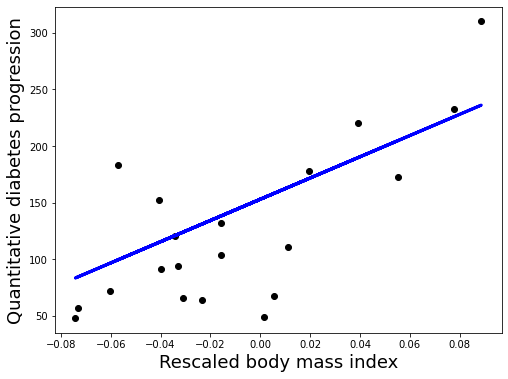

In [3]:
### Regression with linear regression
### From https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
# Code source: Jaques Grobler
# License: BSD 3 clause
# With modification for digital technologies by: Xiaofei Xu

from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr_model = linear_model.LinearRegression()

# Train the model using the training sets
regr_model.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr_model.predict(diabetes_X_test)

# The coefficients
# print("Coefficients: \n", regr_model.coef_)
# The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


fig = plt.gcf()
fig.set_size_inches(8, 6)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)


plt.xlabel('Rescaled body mass index', fontsize=18)
plt.ylabel('Quantitative diabetes progression', fontsize=18)

plt.show()

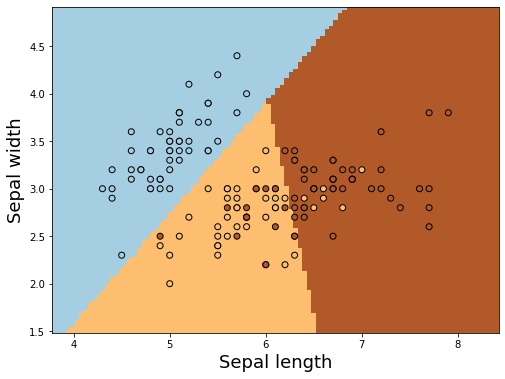

In [4]:
### Classification with logistic regression
### From https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py
# Code source: Gaël Varoquaux
# License: BSD 3 clause
# With modification for digital technologies by: Xiaofei Xu

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import iris data
iris = datasets.load_iris()
# we only take the first two features.
X = iris.data[:, :2]  
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)

plt.xlabel('Sepal length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)

plt.show()

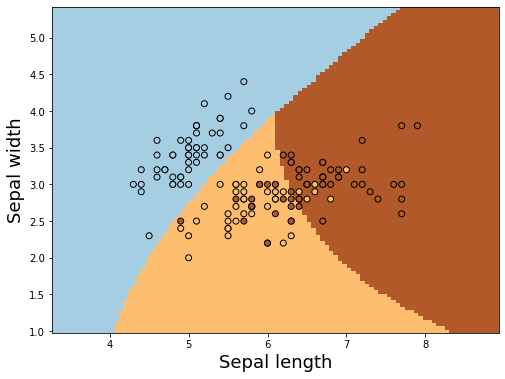

In [5]:
### Classification with support vector machine
# created for digital technologies by: Xiaofei Xu

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(8, 6))

# import iris data
iris = datasets.load_iris()
# we only take the first two features.
X = iris.data[:, :2]  
Y = iris.target

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel="poly")
clf.fit(X, Y)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.axis("tight")
plt.xlabel('Sepal length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.show()

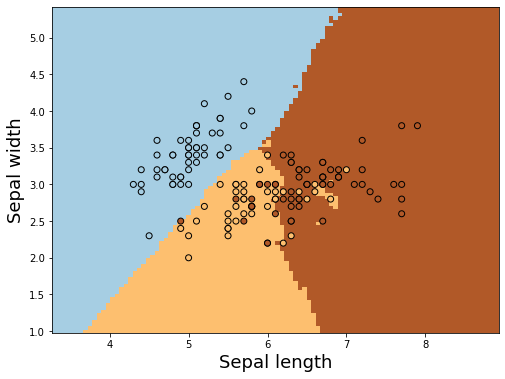

In [6]:
### Classification with K-nearest neighbours
# created for digital technologies by: Xiaofei Xu

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(8, 6))

n_neighbors = 15

# import iris data
iris = datasets.load_iris()

# we only take the first two features.
X = iris.data[:, :2]
y = iris.target

clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform")
clf.fit(X, y)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    ax=ax,
    cmap=plt.cm.Paired,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel('Sepal length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)

plt.show()

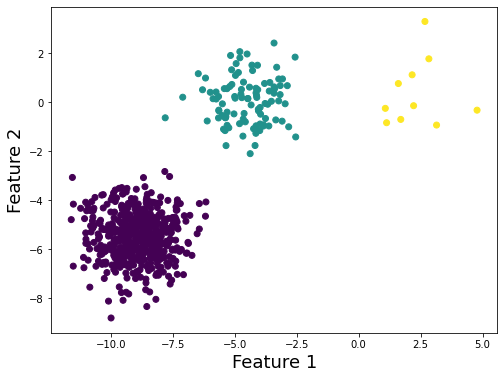

In [7]:
### Clustering with K-means
### From https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause
# With modification for digital technologies by: Xiaofei Xu

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(8, 6))

# Create random distributed blob
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

# plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
# plt.title("Unevenly Sized Blobs")
plt.xlabel('Feature 1', fontsize=18)
plt.ylabel('Feature 2', fontsize=18)


plt.show()